In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
from env import github_token, github_username
import acquire
import prepare
import os
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd

nltk.download('words')
words = set(nltk.corpus.words.words())

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package words to
[nltk_data]     /Users/cashamerica/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# Using .json file to import data collected from github
df = pd.read_json("data.json")
df

,repo,language,readme_contents
0,dickreuter/Poker,Python,"Deep mind pokerbot for pokerstars, partypoker ..."
1,pret/pokered,Assembly,# Pokémon Red and Blue [![Build Status][ci-bad...
2,ishikota/PyPokerEngine,Python,# PyPokerEngine\n\n[![Build Status](https://tr...
3,andrewprock/pokerstove,C++,PokerStove\n==========\n\n[![OpenHUB Metrics](...
4,pokerregion/poker,Python,Poker framework for Python\n==================...
...,...,...,...
495,IMGameDesigner/PokerGame,JavaScript,### 满意请给个star\n### [1.0原版js](https://github.co...
496,houen/PokerFace,ActionScript,This [Actionscript Flash poker (5-card & Texas...
497,ngocbd/pokerserver,Java,# pokerserver\n[![Codacy Badge](https://api.co...
498,mikaelbr/AI-Poker-Player,Python,# AI Poker Player\n===========================...


In [3]:
df.language.value_counts().head(5)

JavaScript    102
Python         88
Java           59
C++            31
C#             26
Name: language, dtype: int64

In [4]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label").head(10)

,n,percent
JavaScript,102,0.212058
Python,88,0.182952
Java,59,0.122661
C++,31,0.064449
C#,26,0.054054
TypeScript,23,0.047817
Ruby,17,0.035343
C,15,0.031185
PHP,14,0.029106
Jupyter Notebook,11,0.022869


In [5]:
df.readme_contents

0      Deep mind pokerbot for pokerstars, partypoker ...
1      # Pokémon Red and Blue [![Build Status][ci-bad...
2      # PyPokerEngine\n\n[![Build Status](https://tr...
3      PokerStove\n==========\n\n[![OpenHUB Metrics](...
4      Poker framework for Python\n==================...
                             ...                        
495    ### 满意请给个star\n### [1.0原版js](https://github.co...
496    This [Actionscript Flash poker (5-card & Texas...
497    # pokerserver\n[![Codacy Badge](https://api.co...
498    # AI Poker Player\n===========================...
499    # Planning Poker\n[![Codacy Badge](https://api...
Name: readme_contents, Length: 500, dtype: object

In [6]:
type(df.readme_contents)

pandas.core.series.Series

In [7]:
def show_all_matches(regexes, subject, re_length=6):
    print('Sentence:')
    print()
    print('    {}'.format(subject))
    print()
    print(' regexp{} | matches'.format(' ' * (re_length - 6)))
    print(' ------{} | -------'.format(' ' * (re_length - 6)))
    for regexp in regexes:
        fmt = ' {:<%d} | {!r}' % re_length
        matches = re.findall(regexp, subject)
        if len(matches) > 8:
            matches = matches[:8] + ['...']
        print(fmt.format(regexp, matches))

### From here we can find specifically the https website code,

### Some of these misspelled words could clue us in on where to go next

In [8]:
df1 = prepare.prepare_blogs(df.readme_contents)



In [9]:
cleaned_df = df1
cleaned_df.lemmed_content[0].split()


['deep',
 'mind',
 'pokerbot',
 'for',
 'pokerstars',
 'partypoker',
 'and',
 'ggpoker',
 'this',
 'pokerbot',
 'play',
 'automatically',
 'on',
 'pokerstars',
 'partypoker',
 'and',
 'gg',
 'poker',
 'any',
 'other',
 'table',
 'can',
 'be',
 'mapped',
 'a',
 'well',
 'it',
 'work',
 'with',
 'image',
 'recognition',
 'montecarlo',
 'simulation',
 'and',
 'a',
 'basic',
 'genetic',
 'algorithm',
 'the',
 'mouse',
 'is',
 'moved',
 'automatically',
 'and',
 'the',
 'bot',
 'can',
 'potentially',
 'play',
 'for',
 'hour',
 'based',
 'on',
 'a',
 'large',
 'number',
 'of',
 'parameter',
 'you',
 'can',
 'download',
 'the',
 'binary',
 'and',
 'run',
 'the',
 'executable',
 'directly',
 'from',
 'here',
 'httpssourceforgenetprojectspartypokerpokerstarspokerbot',
 'running',
 'the',
 'bot',
 'partypoker',
 'use',
 'fast',
 'forward',
 'table',
 'select',
 'official',
 'partypoker',
 'table',
 'scraper',
 'figure',
 'docpartypokergif',
 'pokerstars',
 'use',
 'zoom',
 'table',
 'select',
 '

In [10]:
def splitwords(Series):
        terms_list= []
        frequencey_list = []
        augmented_frequency_list = []
        split_word_dict = {'terms_list': terms_list,
        'frequencey_list': frequencey_list,
        'augmented_frequency_list': augmented_frequency_list,}
        for i in range(0, len(Series)):
                word_list = Series[i]
                for word in word_list:
                        term = word 
                        terms_list.append(term)
                        frequency = word_list.value_counts() / word_list.value_counts().sum()
                        frequencey_list.append(frequency)
                        augmented_frequency = frequency / frequency.max()
                        augmented_frequency_list.append(augmented_frequency)
        return pd.DataFrame(split_word_dict)

In [11]:
new_frame = cleaned_df.lemmed_content.to_frame()
new_frame

,lemmed_content
0,deep mind pokerbot for pokerstars partypoker a...
1,pokemon red and blue build statuscibadgeci thi...
2,pypokerengine build statushttpstravisciorgishi...
3,pokerstove openhub metricshttpswwwopenhubnetpp...
4,poker framework for python travis coverall pyt...
...,...
495,star 10jshttpsgithubcomimgamedesignerpokergame...
496,this actionscript flash poker 5card texas hold...
497,pokerserver codacy badgehttpsapicodacycomproje...
498,ai poker player initial commit for the ai poke...


In [12]:
new_frame.lemmed_content.apply(lambda r: r.split())



0      [deep, mind, pokerbot, for, pokerstars, partyp...
1      [pokemon, red, and, blue, build, statuscibadge...
2      [pypokerengine, build, statushttpstravisciorgi...
3      [pokerstove, openhub, metricshttpswwwopenhubne...
4      [poker, framework, for, python, travis, covera...
                             ...                        
495    [star, 10jshttpsgithubcomimgamedesignerpokerga...
496    [this, actionscript, flash, poker, 5card, texa...
497    [pokerserver, codacy, badgehttpsapicodacycompr...
498    [ai, poker, player, initial, commit, for, the,...
499    [planning, poker, codacy, badgehttpsapicodacyc...
Name: lemmed_content, Length: 500, dtype: object

In [13]:
ee = new_frame.lemmed_content.apply(lambda r: r.split())
ee

0      [deep, mind, pokerbot, for, pokerstars, partyp...
1      [pokemon, red, and, blue, build, statuscibadge...
2      [pypokerengine, build, statushttpstravisciorgi...
3      [pokerstove, openhub, metricshttpswwwopenhubne...
4      [poker, framework, for, python, travis, covera...
                             ...                        
495    [star, 10jshttpsgithubcomimgamedesignerpokerga...
496    [this, actionscript, flash, poker, 5card, texa...
497    [pokerserver, codacy, badgehttpsapicodacycompr...
498    [ai, poker, player, initial, commit, for, the,...
499    [planning, poker, codacy, badgehttpsapicodacyc...
Name: lemmed_content, Length: 500, dtype: object

In [14]:
# # clean up the text
# document = document.lower().replace(',', '').replace('.', '')
# # transform into a series
# words = pd.Series(document.split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': new_frame.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

raw_count  frequency  \
lemmed_content                                                             
                                                           39      0.078   
ironhack logohttpsiimgurcom1qgrnnwpng lab calcu...          4      0.008   
devopspoker devops poker bot template how to us...          2      0.004   
pokemon red and blue build statustravisbadgetra...          2      0.004   
poker                                                       2      0.004   
...                                                       ...        ...   
nlth poker agent using counterfactual regret mi...          1      0.002   
nextgenerationscrumpoker prototype for a new sc...          1      0.002   
neuron poker openai gym environment for texas h...          1      0.002   
netease pomelounity543 win7 unity 541 nodejs 58...          1      0.002   
zippysolver an open source solver developed by ...          1      0.002   

                                                    augmented_frequency  
lemmed_content                                                           
                                                               1.000000  
ironhack logohttpsiimgurcom1qgrnnwpng lab calcu...             0.102564  
devopspoker devops poker bot template how to us...             0.051282  
pokemon red and blue build statustravisbadgetra...             0.051282  
poker                                                          0.051282  
...                                                                 ...  
nlth poker agent using counterfactual regret mi...             0.025641  
nextgenerationscrumpoker prototype for a new sc...             0.025641  
neuron poker openai gym environment for texas h...             0.025641  
netease pomelounity543 win7 unity 541 nodejs 58...             0.025641  
zippysolver an open source solver developed by ...             0.025641  

[454 rows x 3 columns]

In [15]:
#the solution will come for the apply method
#the problem pointed out with ee is that the string are in fact split but they return one string that has all these entries
#now then to make the most of the these lists
#I would need to make each word its own index point in a series 
#the problem here is that if I end  up splitting it this way I lose the index and we lose where these words come from
#this can
words
#words in this specific scenario are a pandas series

{'jinja',
 'bhara',
 'Gorkiesque',
 'Glossophaga',
 'rhodospermin',
 'boondoggle',
 'algorism',
 'Mechir',
 'bedangled',
 'papability',
 'Cerdonian',
 'unoffered',
 'Eopaleozoic',
 'disaproned',
 'hoofiness',
 'choil',
 'crenelation',
 'fineleaf',
 'scrotum',
 'constructible',
 'aroid',
 'sulphurless',
 'unconsumptive',
 'chalutzim',
 'cheke',
 'pabulation',
 'personalia',
 'electrodynamic',
 'emoloa',
 'shier',
 'wymote',
 'jag',
 'estimation',
 'yashiro',
 'anamorphote',
 'uppile',
 'embira',
 'Alebion',
 'pantostomate',
 'shouting',
 'vichyssoise',
 'inconsonance',
 'textualism',
 'mystagogically',
 'Normanish',
 'multifid',
 'teemingly',
 'unobserved',
 'angiochondroma',
 'pregirlhood',
 'flagitious',
 'unspringlike',
 'writative',
 'elegiambic',
 'antioptionist',
 'marplotry',
 'acerous',
 'ultrasonic',
 'overconcern',
 'betattered',
 'Catherine',
 'exerciser',
 'unfastidiousness',
 'subbias',
 'monumentalism',
 'enuresis',
 'trouble',
 'thigmotactically',
 'diaphoresis',
 'restis

In [16]:
new_frame

,lemmed_content
0,deep mind pokerbot for pokerstars partypoker a...
1,pokemon red and blue build statuscibadgeci thi...
2,pypokerengine build statushttpstravisciorgishi...
3,pokerstove openhub metricshttpswwwopenhubnetpp...
4,poker framework for python travis coverall pyt...
...,...
495,star 10jshttpsgithubcomimgamedesignerpokergame...
496,this actionscript flash poker 5card texas hold...
497,pokerserver codacy badgehttpsapicodacycomproje...
498,ai poker player initial commit for the ai poke...


In [17]:
# for i in new_frame.lemmed_content:
word_list = new_frame.lemmed_content[0].split()

In [18]:
words_list = pd.Series(new_frame.lemmed_content[0].split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words_list.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

,raw_count,frequency,augmented_frequency
the,169,0.072626,1.000000
to,87,0.037387,0.514793
a,54,0.023206,0.319527
and,50,0.021487,0.295858
you,45,0.019338,0.266272
...,...,...,...
read,1,0.000430,0.005917
learn,1,0.000430,0.005917
easiest,1,0.000430,0.005917
codebase,1,0.000430,0.005917


In [19]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [20]:
#########################################################

Let's break the data up into seperate pieces:

The words that appear in legitimate text messages.
The words that appear in spam text messages.
All of the words.

In [21]:
JavaScript = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
Python = clean(' '.join(df[df.language == 'Python'].readme_contents))
Java = clean(' '.join(df[df.language == 'Java'].readme_contents))
Cplusplus = clean(' '.join(df[df.language == 'C++'].readme_contents))
C_sharp = clean(' '.join(df[df.language == 'C#'].readme_contents))


all_words = clean(' '.join(df.readme_contents))

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [22]:
JavaScript_freq = pd.Series(JavaScript).value_counts()
Python_freq = pd.Series(Python).value_counts()
Java_ferq = pd.Series(Java).value_counts()
Cplusplus_freq = pd.Series(Cplusplus).value_counts()
C_sharp_freq = pd.Series(C_sharp).value_counts()
all_freq = pd.Series(all_words).value_counts()

all_freq.head(20)


poker      1165
player     1031
hand       1012
game       1011
card        988
run         655
1           547
use         448
code        423
bot         398
install     395
server      389
3           370
project     361
new         341
table       322
using       320
file        319
test        309
make        303
dtype: int64

#### Now we'll combine these together to get one resulting data frame that we can work with:

In [23]:
word_counts = (pd.concat([all_freq, JavaScript_freq, Java_ferq, Cplusplus_freq, C_sharp_freq, Python_freq], axis=1, sort=True)
                .set_axis(['all_words', 'JavaScript', 'Python', 'Java', 'Cplusplus', 'C_sharp'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all_words,JavaScript,Python,Java,Cplusplus,C_sharp
0,228,79,7,23,7,35
00,7,0,0,0,0,0
000,2,0,0,0,0,0
0000,1,1,0,0,0,0
000000,2,0,0,0,1,0


### We can now use this data set to answer some interesting questions:

- What's the most frequently used language?


In [24]:
word_counts.sort_values(by='all_words', ascending=False).head(10)


,all_words,JavaScript,Python,Java,Cplusplus,C_sharp
poker,1165,208,148,42,90,238
player,1031,177,162,41,58,244
hand,1012,222,71,86,83,208
game,1011,167,145,58,65,274
card,988,259,84,71,46,174
run,655,201,52,42,29,139
1,547,152,42,39,34,96
use,448,88,63,41,8,114
code,423,113,47,19,17,86
bot,398,104,79,0,6,126


Text(0.5, 1.0, 'Most common words across top 5 programming languages')

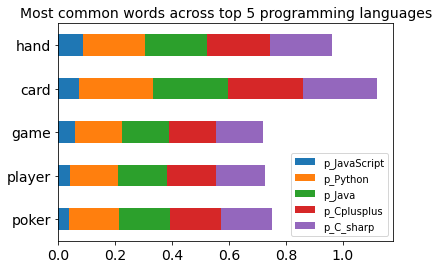

In [196]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_JavaScript=word_counts.Java / word_counts['all_words'], 
         p_Python=word_counts.JavaScript / word_counts['all_words'],
         p_Java=word_counts.JavaScript / word_counts['all_words'],
         p_Cplusplus=word_counts.JavaScript / word_counts['all_words'],
         p_C_sharp=word_counts.JavaScript / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_JavaScript', 'p_Python', 'p_Java', 'p_Cplusplus','p_C_sharp']]
 .tail(5)
 .sort_values('p_JavaScript')
 .plot.barh(stacked=True, fontsize=14))

plt.title('Most common words across top 5 programming languages', fontsize=14)


In [26]:
word_counts.JavaScript.tail(3)

zune      0
zypper    0
zzmj      0
Name: JavaScript, dtype: int64

Text(0.5, 1.0, 'Top 5 most common words in JavaScripts')

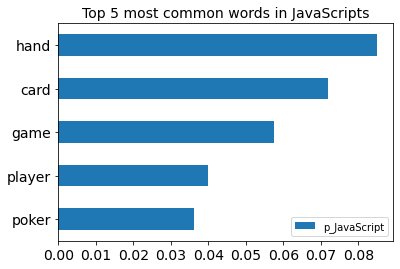

In [198]:
# figure out the percentage
(word_counts
 .assign(p_JavaScript=word_counts.Java / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_JavaScript']]
 .tail(5)
 .sort_values('p_JavaScript')
 .plot.barh(stacked=True, fontsize=14))

plt.title('Top 5 most common words in JavaScripts', fontsize=14)

Text(0.5, 1.0, 'Top 5 most common words in Python')

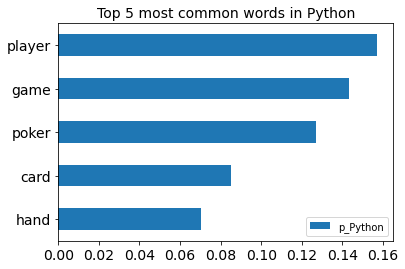

In [197]:
# figure out the percentage
(word_counts
 .assign(p_Python=word_counts.Python / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_Python']]
 .tail(5)
 .sort_values('p_Python')
 .plot.barh(stacked=True, fontsize=14))

plt.title('Top 5 most common words in Python', fontsize=14)

Text(0.5, 1.0, 'Top 5 most common words in Java')

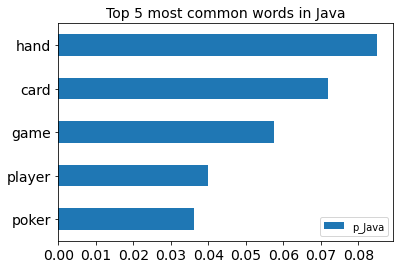

In [187]:
# figure out the percentage
(word_counts
 .assign(p_Java=word_counts.Java / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_Java']]
 .tail(5)
 .sort_values('p_Java')
 .plot.barh(stacked=True, fontsize=14))

plt.title('Top 5 most common words in Java', fontsize=14)

Text(0.5, 1.0, 'Proportion of Cplusplus 20 most common words')

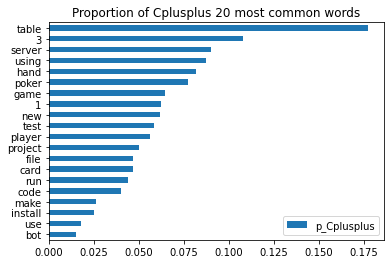

In [30]:
# figure out the percentage
(word_counts
 .assign(p_Cplusplus=word_counts.Cplusplus / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_Cplusplus']]
 .tail(20)
 .sort_values('p_Cplusplus')
 .plot.barh(stacked=True))

plt.title('Proportion of Cplusplus 20 most common words')

Text(0.5, 1.0, 'Proportion of C# 20 most common words')

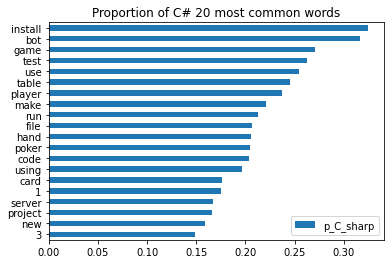

In [75]:
# figure out the percentage
(word_counts
 .assign(p_C_sharp=word_counts.C_sharp / word_counts['all_words'])
 .sort_values(by='all_words')
 [['p_C_sharp']]
 .tail(20)
 .sort_values('p_C_sharp')
 .plot.barh(stacked=True))

plt.title('Proportion of C# 20 most common words')

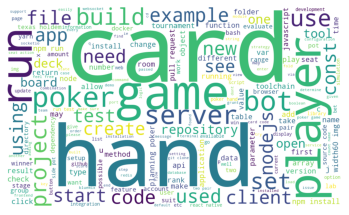

In [188]:
JavaScript_freq_cloud = WordCloud(background_color='white', height=600, width=1000).generate(' '.join(JavaScript))


plt.imshow(JavaScript_freq_cloud)
plt.axis("off")
plt.show()

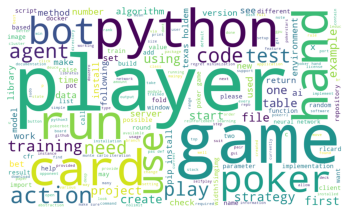

In [191]:
Python_freq_cloud = WordCloud(background_color='white', height=600, width=1000).generate(' '.join(Python))


plt.imshow(Python_freq_cloud)
plt.axis("off")
plt.show()

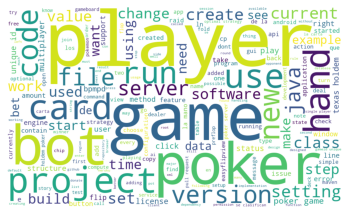

In [193]:
Java_freq_cloud = WordCloud(background_color='white', height=600, width=1000).generate(' '.join(Java))


plt.imshow(Java_freq_cloud)
plt.axis("off")
plt.show()

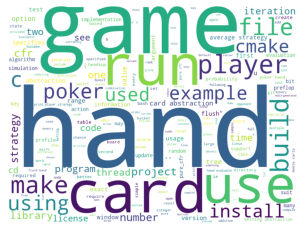

In [67]:
Cplusplus_freq_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Cplusplus))


plt.imshow(Cplusplus_freq_cloud)
plt.axis("off")
plt.show()

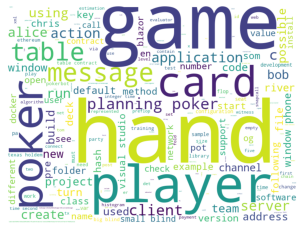

In [76]:
C_sharp_freq_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(C_sharp))


plt.imshow(C_sharp_freq_cloud)
plt.axis("off")
plt.show()

### Are there any words that uniquely identify a different language?


, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

### We can apply Bigrams n-grams concept to transformation our data sets in order to find out which bigrams are the most frequently occuring.

In [206]:
top_20_allwords_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .tail(40))

top_20_allwords_bigrams.head(100)

(creates, schedule)                                                      1
(schedule, job)                                                          1
(job, making)                                                            1
(request, endpoint)                                                      1
(endpoint, use)                                                          1
(python, crontab)                                                        1
(crontab, package)                                                       1
(package, managing)                                                      1
(managing, cronjobs)                                                     1
(graphmediagame2png, poker)                                              1
(respectively, graphmediagame1png)                                       1
(fewer, hand)                                                            1
(player, graphmediatraining_run_82m_bbplayerpng)                         1
(folded, strong)         

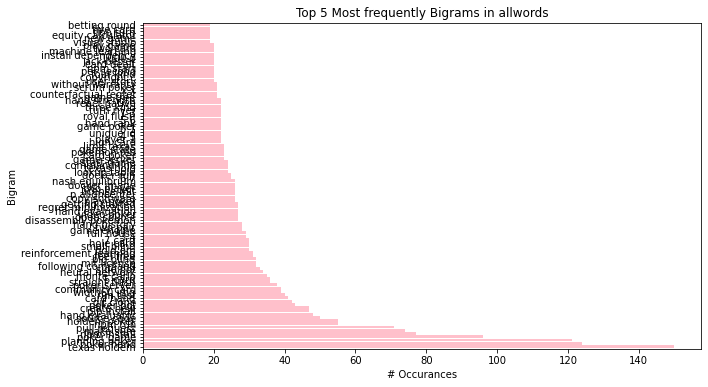

In [200]:
top_20_allwords_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('Top 5 Most frequently Bigrams in allwords')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_allwords_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


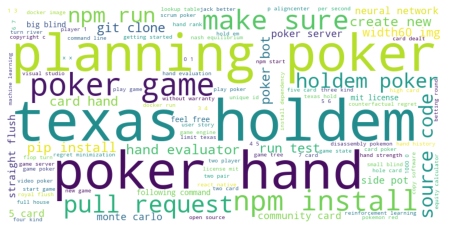

In [201]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_allwords_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


In [162]:
JavaScript_bigrams = (pd.Series(nltk.ngrams(JavaScript, 2))
                      .value_counts()
                      .head(30))
JavaScript_bigrams.head(5)


(npm, install)       46
(width60, img)       39
(npm, run)           39
(pull, request)      30
(planning, poker)    30
dtype: int64

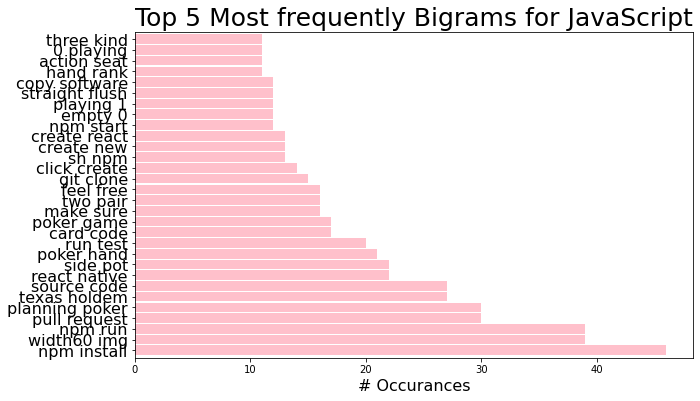

In [163]:
JavaScript_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))


plt.title('Top 5 Most frequently Bigrams for JavaScript', fontsize=25)
plt.xlabel('# Occurances', fontsize=16)

# make the labels pretty
ticks, _ = plt.yticks()
labels = JavaScript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels, fontsize=16)

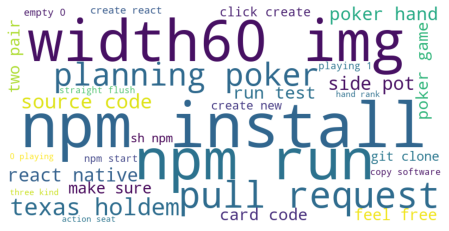

In [164]:
data = {k[0] + ' ' + k[1]: v for k, v in JavaScript_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [159]:
Python_bigrams = (pd.Series(nltk.ngrams(Python, 2))
                      .value_counts()
                      .head(5))
Python_bigrams.head(5)

(texas, holdem)              42
(pip, install)               41
(poker, game)                28
(reinforcement, learning)    27
(neural, network)            27
dtype: int64

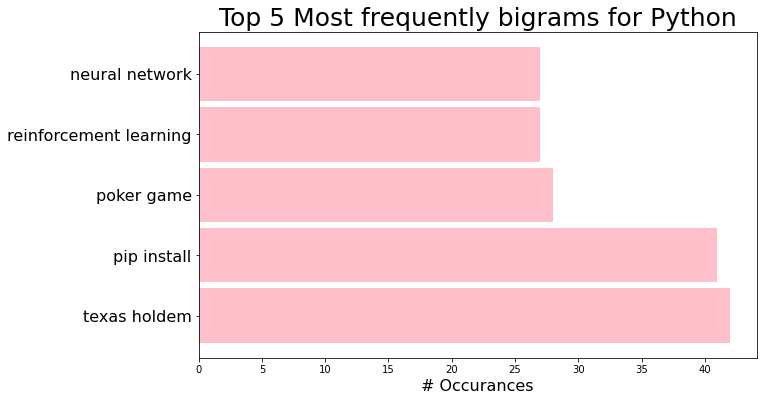

In [161]:
Python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('Top 5 Most frequently bigrams for Python', fontsize=25)
plt.xlabel('# Occurances', fontsize=16)

# make the labels pretty
ticks, _ = plt.yticks()
labels = Python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels, fontsize=16)

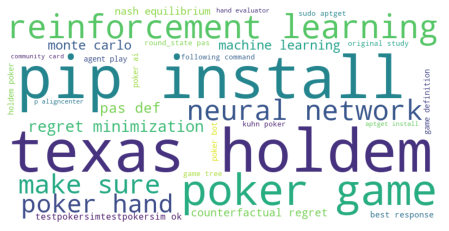

In [143]:
data = {k[0] + ' ' + k[1]: v for k, v in Python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [156]:
Java_bigrams = (pd.Series(nltk.ngrams(Java, 2))
                      .value_counts()
                      .head(5))
Java_bigrams.head(5)

(poker, game)      23
(texas, holdem)    22
(unique, id)       21
(de, la)           14
(poker, server)    13
dtype: int64

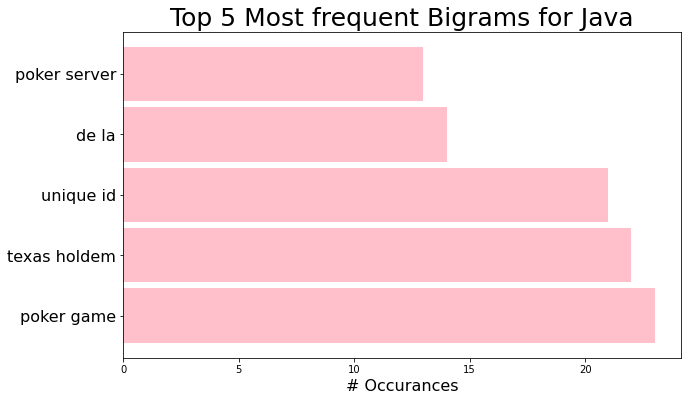

In [157]:
Java_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('Top 5 Most frequent Bigrams for Java', fontsize=25)
plt.xlabel('# Occurances', fontsize=16)

# make the labels pretty
ticks, _ = plt.yticks()
labels = Java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels, fontsize=16)

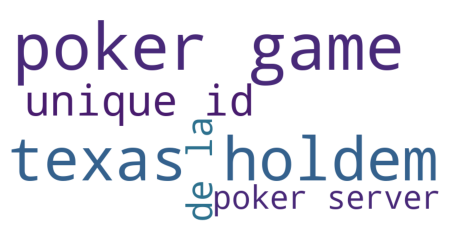

In [97]:
data = {k[0] + ' ' + k[1]: v for k, v in Java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [98]:
Cplusplus_bigrams = (pd.Series(nltk.ngrams(Cplusplus, 2))
                      .value_counts()
                      .head(5))
Cplusplus_bigrams.head(5)

(card, abstraction)       18
(average, strategy)       15
(poker, hand)             11
(betting, abstraction)    10
(monte, carlo)             9
dtype: int64

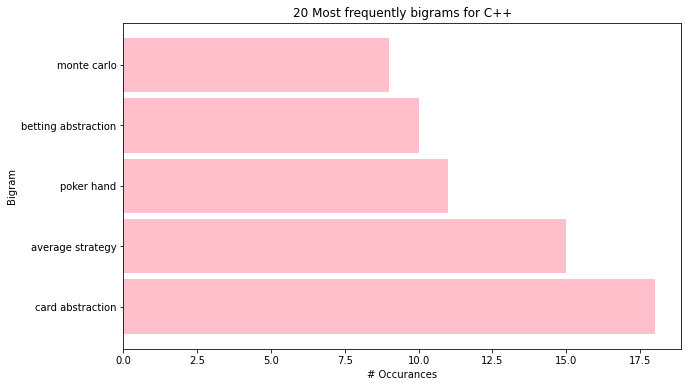

In [99]:
Cplusplus_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently bigrams for C++')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = Cplusplus_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

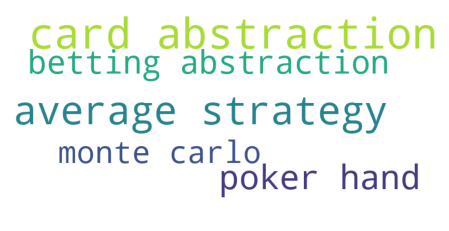

In [100]:
data = {k[0] + ' ' + k[1]: v for k, v in Cplusplus_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [101]:
C_sharp_bigrams = (pd.Series(nltk.ngrams(C_sharp, 2))
                      .value_counts()
                      .head(5))
C_sharp_bigrams.head(5)

(planning, poker)    35
(window, phone)      15
(visual, studio)     13
(small, blind)       11
(big, blind)          9
dtype: int64

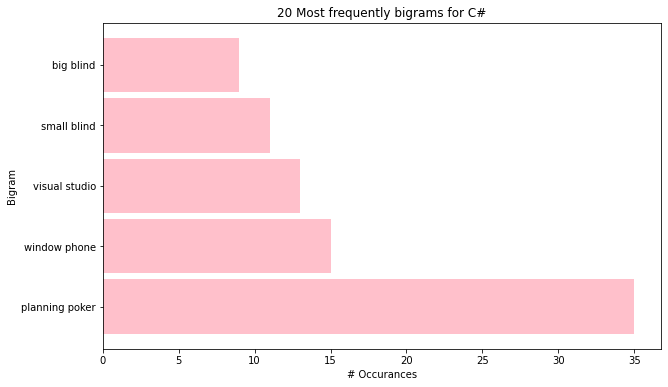

In [102]:
C_sharp_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently bigrams for C#')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = C_sharp_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

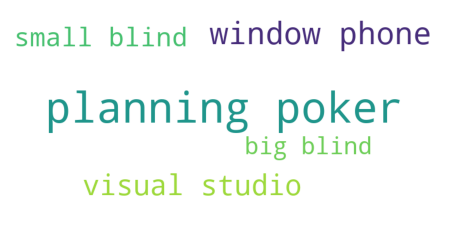

In [103]:
data = {k[0] + ' ' + k[1]: v for k, v in C_sharp_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

Here is a huge win from here David will take the stopwords out and get this project going as for me I am going to need to repeat this process over for all of the rest of the corpus text

Snippets from the explore chapter both in the circulumn and excercise review

Ryan Mcall referenced his exercise

From here the problem is that if the words are split up what ways do we have to organize them?

I feel like we can cross that bridge when we get there.

We might need to implement stopwords to get rid of non-useful words.

- the concern here is that words like "the, a, an" are gonna come up as the most often used
    - these do not yeild useful information
    - "tf and idf will account for the stopwords"

JavaScript_freq = pd.Series(JavaScript).value_counts()
Java_ferq = pd.Series(Java).value_counts()
Cplusplus_freq = pd.Series(Cplusplus).value_counts()
C_sharp_freq = pd.Series(C_sharp).value_counts()
TypeScript_freq = pd.Series(TypeScript).value_counts()
Ruby_freq = pd.Series(Ruby).value_counts()
Cee_freq = pd.Series(Cee).value_counts()
PeeHpee_freq = pd.Series(PeeHpee).value_counts()
Jupyter_Notebook_freq = pd.Series(Jupyter_Notebook).value_counts()
Assembly_freq = pd.Series(Assembly).value_counts()
all_freq = pd.Series(all_words).value_counts()

all_freq.head(20)